In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix

In [28]:
import matplotlib.pyplot as plt

In [46]:
from mlxtend.plotting import plot_confusion_matrix

In [1]:
!pip install mlxtend 

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
tf.__version__ #check version of the tensorflow

'2.5.0'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mnist = keras.datasets.fashion_mnist

In [7]:
type(mnist)

module

In [8]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
np.max(x_train)

255

In [11]:
np.mean(x_train) # value is in between 0 and 255 in x_train

72.94035223214286

In [12]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

#### Data Exploration

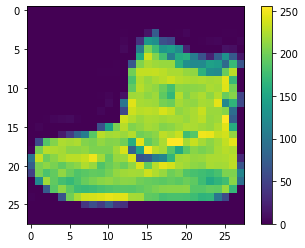

In [13]:
plt.imshow(x_train[0])
plt.colorbar()

In [14]:
x_train = x_train/255.0
x_test = x_test/255.0

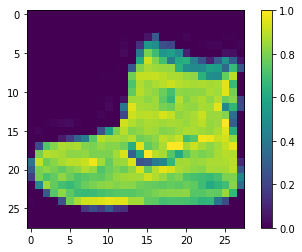

In [15]:
plt.imshow(x_train[0])
plt.colorbar()

In [37]:
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
history = model.fit(x_train,y_train,epochs=10,batch_size=10, verbose=1,validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.4960 - accuracy: 0.8231 - val_loss: 0.4072 - val_accuracy: 0.8532
Epoch 2/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3762 - accuracy: 0.8638 - val_loss: 0.3927 - val_accuracy: 0.8508
Epoch 3/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3365 - accuracy: 0.8754 - val_loss: 0.3656 - val_accuracy: 0.8689
Epoch 4/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.3157 - accuracy: 0.8819 - val_loss: 0.3374 - val_accuracy: 0.8792
Epoch 5/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.2986 - accuracy: 0.8885 - val_loss: 0.3625 - val_accuracy: 0.8735
Epoch 6/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.2831 - accuracy: 0.8952 - val_loss: 0.3433 - val_accuracy: 0.8774
Epoch 7/10
4800/4800 [==============================] - 10s 2ms/step - loss: 0.2721 - accuracy: 0.8985 - val_loss: 0.3398 - val_ac

In [41]:
loss_test, accuracy_test = model.evaluate(x_test,y_test)
print(loss_test, accuracy_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8823
0.36141178011894226 0.8823000192642212


In [42]:
y_pred = model.predict_classes(x_test) #model.predict gives continous values of predictions in a array. here we need the classes, hence predict.classes i.e categorical values
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.8823

In [43]:
help(model)

Help on Sequential in module tensorflow.python.keras.engine.sequential object:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalu

In [44]:
history.history

{'accuracy': [0.8231041431427002,
  0.8637708425521851,
  0.8753541707992554,
  0.8818541765213013,
  0.8884999752044678,
  0.8952083587646484,
  0.8984583616256714,
  0.902916669845581,
  0.9054166674613953,
  0.909375011920929],
 'loss': [0.49601390957832336,
  0.37617021799087524,
  0.3364638388156891,
  0.31571853160858154,
  0.2986410856246948,
  0.28307077288627625,
  0.2720588445663452,
  0.25894808769226074,
  0.2524629235267639,
  0.2426171898841858],
 'val_accuracy': [0.8531666398048401,
  0.8507500290870667,
  0.8689166903495789,
  0.8792499899864197,
  0.8734999895095825,
  0.8774166703224182,
  0.8815833330154419,
  0.8846666812896729,
  0.8784166574478149,
  0.8866666555404663],
 'val_loss': [0.4072081744670868,
  0.3926902711391449,
  0.3655530512332916,
  0.33741331100463867,
  0.3624512553215027,
  0.3432866334915161,
  0.3398006856441498,
  0.32728269696235657,
  0.35429272055625916,
  0.3352155387401581]}

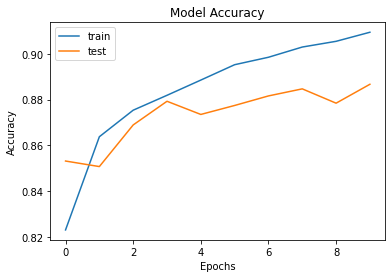

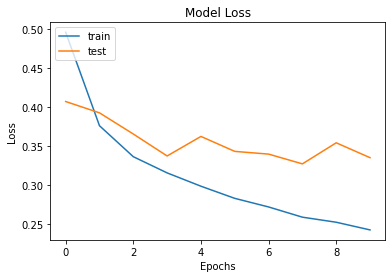

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a0e2e3550>)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


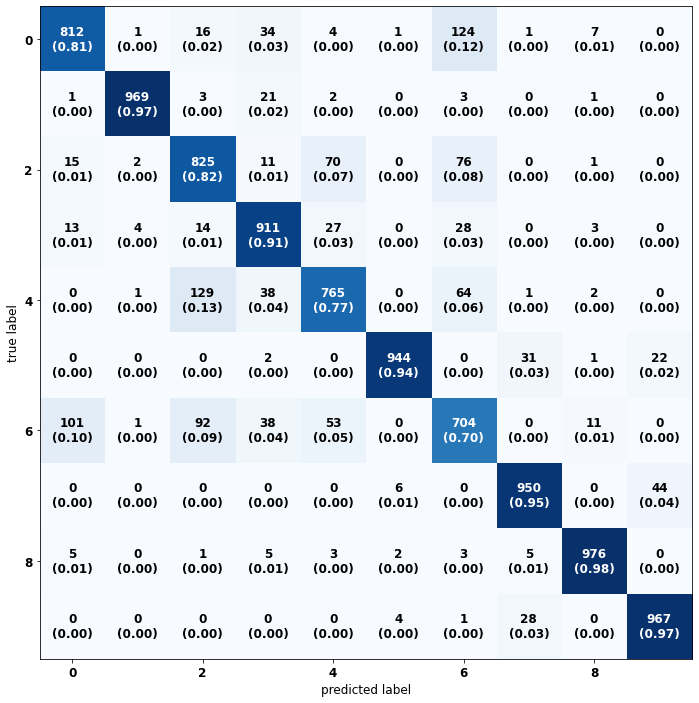

In [57]:
font = {
    'family': 'Times New Roman',
    #'weight': 'bold',
    'size' : 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(12,12),show_normed=True) #show normed also displays accuracy for each classes